In [1]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# nltk.download_shell()

In [3]:
raw_messages = [
    line.rstrip() for line in open("./SMSSpamCollection", "r")
]

In [4]:
len(raw_messages)

5574

In [5]:
messages = [{num: message} for num, message in enumerate(raw_messages)]
messages[50]

{50: 'ham\tWhat you thinked about me. First time you saw me in class.'}

In [6]:
pd_messages = pd.read_csv("./SMSSpamCollection", sep="\t", names=["label", "message"])
pd_messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
pd_messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
pd_messages.groupby("label").count()

,message
label,
ham,4825
spam,747


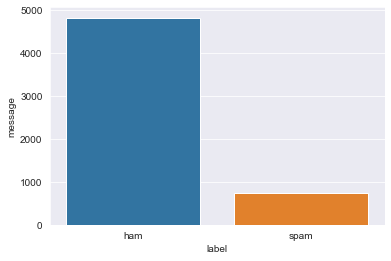

In [9]:
sns.barplot(
    data=pd_messages.groupby("label").count().reset_index(),
    x="label",
    y="message"
)

In [10]:
pd_messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
pd_messages["length"] = pd_messages.message.str.len()
pd_messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


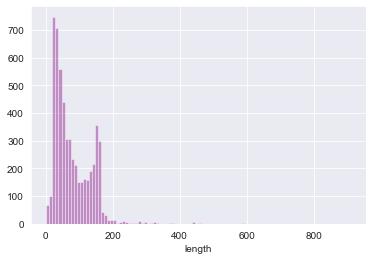

In [80]:
sns.distplot(
    pd_messages["length"],
    bins=100,
    kde=False,
    color="purple",
)

In [13]:
pd_messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
pd_messages.sort_values("length", ascending=False).iloc[0][1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C4861214F0>,
      dtype=object)

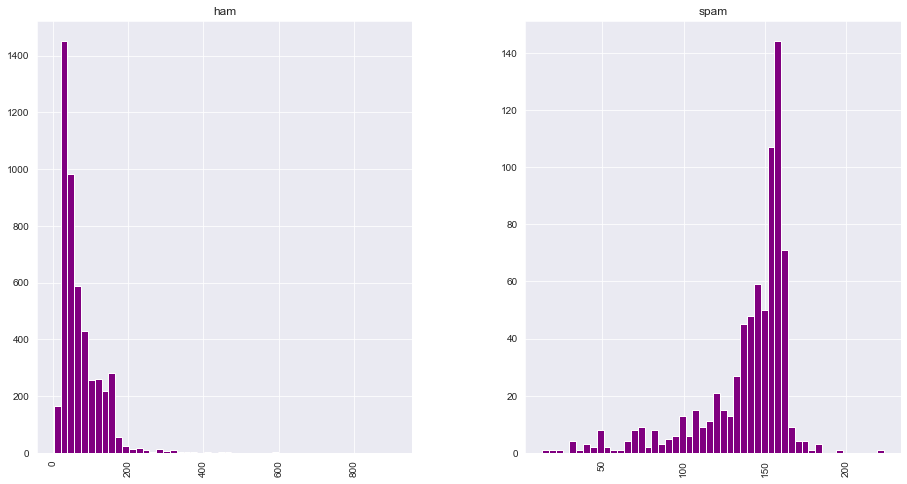

In [15]:
pd_messages.hist(column="length", by="label", bins=50, figsize=(15, 8), color="purple")

In [16]:
test_msg = "this is not the greatest message in the world, this is just a tribute"

In [17]:
from nltk.corpus import stopwords
import string

In [18]:
def split_message(
    msg
):
    remove_punc = ''.join([char for char in msg if char not in string.punctuation])
    return [
        w 
        for w 
        in remove_punc.split() 
        if w.lower() not in stopwords.words("english")
    ]

In [19]:
pd_messages["tokens"] = pd_messages["message"].apply(split_message)

In [20]:
pd_messages.head()

,label,message,length,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [21]:
from sklearn.feature_extraction.text import CountVectorizer 

In [24]:
bag_of_words = CountVectorizer(analyzer=split_message).fit(pd_messages["message"])

In [28]:
len(bag_of_words.vocabulary_)

11425

In [43]:
message3 = pd_messages["message"][3]
message3

'U dun say so early hor... U c already then say...'

In [44]:
bow3 = bag_of_words.transform([message3])
bow3

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [45]:
print(bow3)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow3.shape)

(1, 11425)


In [48]:
bag_of_words.get_feature_names()[9554]

'say'

In [50]:
messages_bow = bag_of_words.transform(pd_messages["message"])

In [51]:
print("Shape of sparce matrix: ", messages_bow.shape)

Shape of sparce matrix:  (5572, 11425)


In [53]:
messages_bow.nnz

50548

In [55]:
sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(f"Sparcity: {sparsity}")

Sparcity: 0.07940295412668218


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [58]:
tfidf3 = tfidf_transformer.transform(bow3)
print(tfidf3)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [59]:
tfidf_transformer.idf_[bag_of_words.vocabulary_['running']]

7.8339293183414815

In [70]:
messages_tidf = tfidf_transformer.transform(messages_bow)
messages_tidf.shape

(5572, 11425)

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
spam_detector = MultinomialNB().fit(messages_tfidf, pd_messages["label"])

In [73]:
spam_detector.predict(tfidf3)

array(['ham'], dtype='<U4')

In [79]:
pd_messages.iloc[3]

label                                                    ham
message    U dun say so early hor... U c already then say...
length                                                    49
tokens         [U, dun, say, early, hor, U, c, already, say]
Name: 3, dtype: object

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
msg_train, msg_test, label_train, label_test = train_test_split(pd_messages["message"], pd_messages["label"], test_size=0.3)

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_message)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [87]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function split_message at 0x000002C4862E6C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [88]:
predictions = pipeline.predict(msg_test)

In [89]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1449
        spam       1.00      0.71      0.83       223

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

